# ANALYSIS OF BENCHMARK

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 1. Data

In [8]:
data = [
    # GNN
    {"Model": "GNN", "Gene feature": "CGP", "Cell feature": "CNV", "Test AP": 0.91, "Test gene AP": 0.62, "Test cell AP": 0.89},
    {"Model": "GNN", "Gene feature": "CGP", "Cell feature": "MOSA", "Test AP": 0.92, "Test gene AP": 0.67, "Test cell AP": 0.90},
    {"Model": "GNN", "Gene feature": "CGP", "Cell feature": "expression", "Test AP": 0.94, "Test gene AP": 0.73, "Test cell AP": 0.93},
    {"Model": "GNN", "Gene feature": "CGP", "Cell feature": "expression_mg", "Test AP": 0.93, "Test gene AP": 0.67, "Test cell AP": 0.91},

    # GNN-GNN
    {"Model": "GNN-GNN", "Gene feature": "CGP", "Cell feature": "CNV", "Test AP": 0.91, "Test gene AP": 0.61, "Test cell AP": 0.89},
    {"Model": "GNN-GNN", "Gene feature": "CGP", "Cell feature": "MOSA", "Test AP": 0.93, "Test gene AP": 0.68, "Test cell AP": 0.91},
    {"Model": "GNN-GNN", "Gene feature": "CGP", "Cell feature": "expression", "Test AP": 0.95, "Test gene AP": 0.73, "Test cell AP": 0.93},
    {"Model": "GNN-GNN", "Gene feature": "CGP", "Cell feature": "expression_mg", "Test AP": 0.95, "Test gene AP": 0.73, "Test cell AP": 0.93},

    # MLP-GNN
    {"Model": "MLP-GNN", "Gene feature": "CGP", "Cell feature": "CNV", "Test AP": 0.90, "Test gene AP": 0.58, "Test cell AP": 0.88},
    {"Model": "MLP-GNN", "Gene feature": "CGP", "Cell feature": "MOSA", "Test AP": 0.92, "Test gene AP": 0.67, "Test cell AP": 0.90},
    {"Model": "MLP-GNN", "Gene feature": "CGP", "Cell feature": "expression", "Test AP": 0.94, "Test gene AP": 0.71, "Test cell AP": 0.92},
    {"Model": "MLP-GNN", "Gene feature": "CGP", "Cell feature": "expression_mg", "Test AP": 0.93, "Test gene AP": 0.67, "Test cell AP": 0.91},

    # MLP
    {"Model": "MLP", "Gene feature": "CGP", "Cell feature": "CNV", "Test AP": 0.91, "Test gene AP": 0.62, "Test cell AP": 0.89},
    {"Model": "MLP", "Gene feature": "CGP", "Cell feature": "MOSA", "Test AP": 0.93, "Test gene AP": 0.70, "Test cell AP": 0.91},
    {"Model": "MLP", "Gene feature": "CGP", "Cell feature": "expression", "Test AP": 0.95, "Test gene AP": 0.76, "Test cell AP": 0.94},
    {"Model": "MLP", "Gene feature": "CGP", "Cell feature": "expression_mg", "Test AP": 0.95, "Test gene AP": 0.76, "Test cell AP": 0.94},
]

df = pd.DataFrame(data)

# 2. Plots

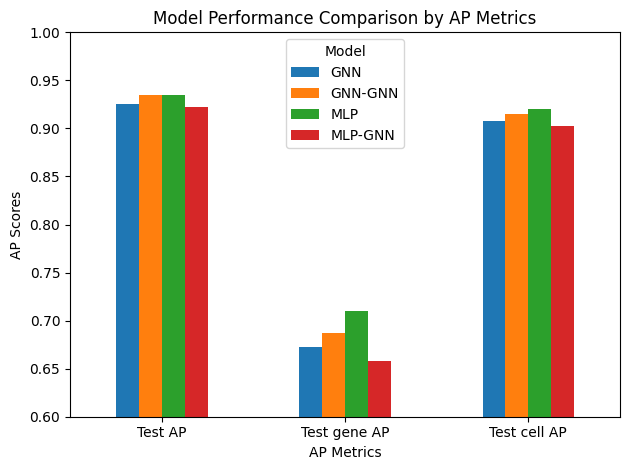

<Figure size 640x480 with 0 Axes>

In [9]:
# Reshape the data for the desired plot
mean_by_model = df.groupby("Model")[["Test AP", "Test gene AP", "Test cell AP"]].mean()

# Transpose the dataframe to have AP metrics on x-axis and models as bars
mean_by_model_transposed = mean_by_model.T

ax = mean_by_model_transposed.plot.bar(rot=0)

# Set the y-axis to start at 0.6
ax.set_ylim(bottom=0.6, top=1.0)

# Set labels
ax.set_xlabel("AP Metrics")
ax.set_ylabel("AP Scores")
ax.set_title("Model Performance Comparison by AP Metrics")

# Adjust plot to prevent labels from being cut off
plt.tight_layout()
plt.show()

plt.savefig("./Data/Figures/All/Mean_metrics_per_model.png")

### AP scores by model 

#### scatter plots

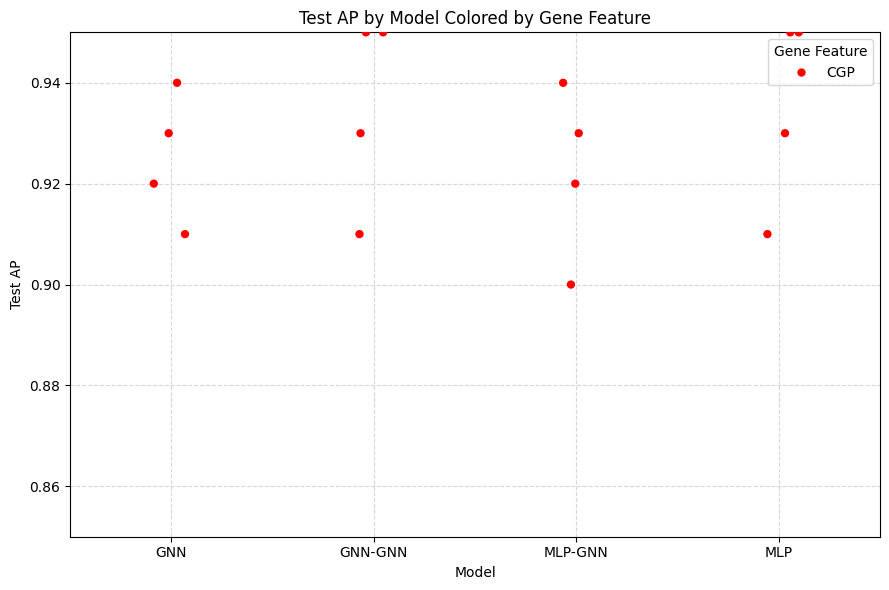

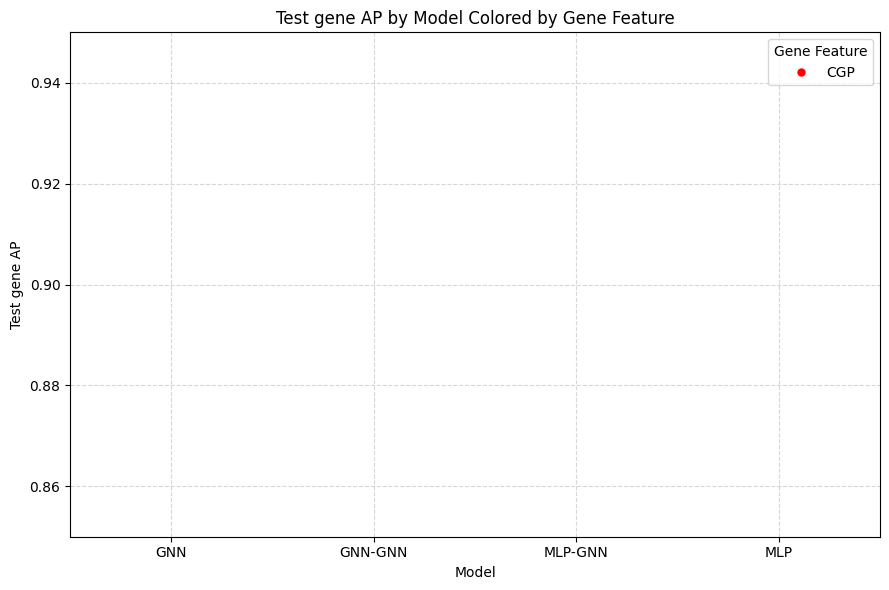

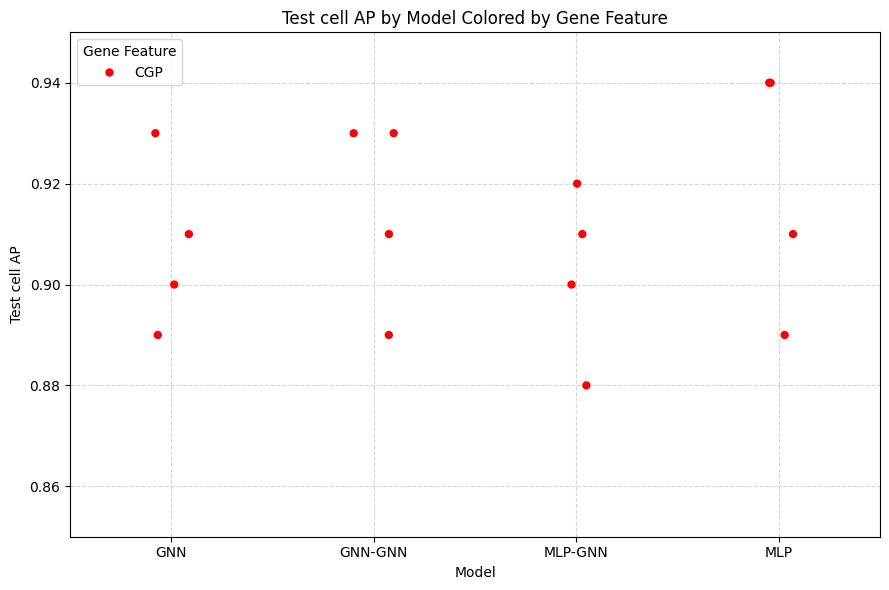

In [13]:

# Map gene features to colors
palette = {"CGP": "red", "C4": "black"}

# Plot
plt.figure(figsize=(9, 6))
sns.stripplot(data=df, x="Model", y="Test AP", hue="Gene feature", palette=palette, jitter=True, size=6)

plt.title("Test AP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()

# Plot
plt.figure(figsize=(9, 6))
sns.stripplot(data=df, x="Model", y="Test gene AP", hue="Gene feature", palette=palette, jitter=True, size=6)

plt.title("Test gene AP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()

# Plot
plt.figure(figsize=(9, 6))
sns.stripplot(data=df, x="Model", y="Test cell AP", hue="Gene feature", palette=palette, jitter=True, size=6)

plt.title("Test cell AP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()

#### boxplots

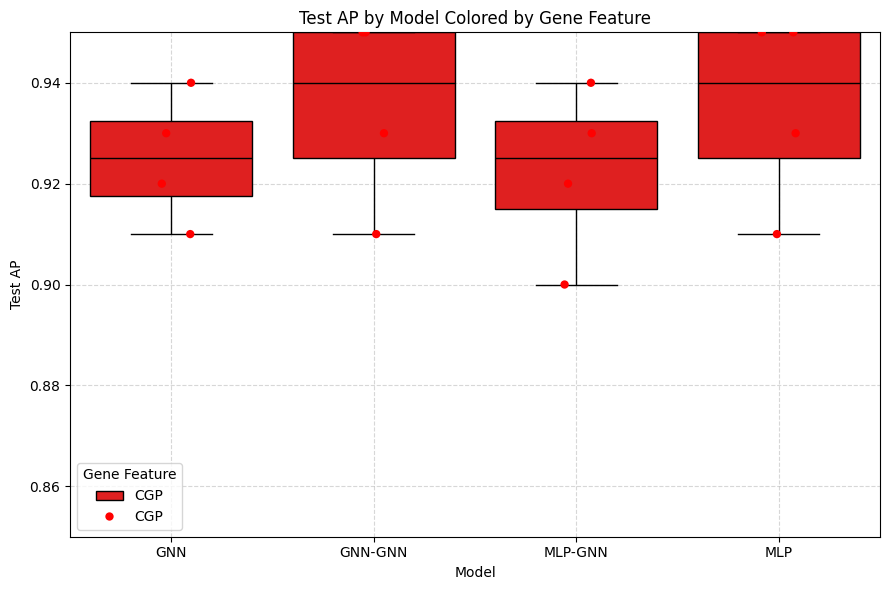

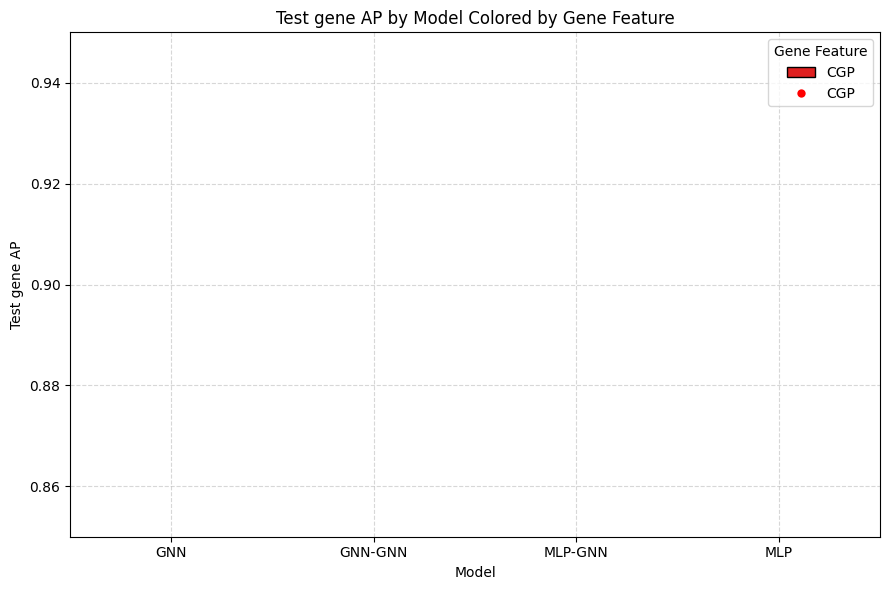

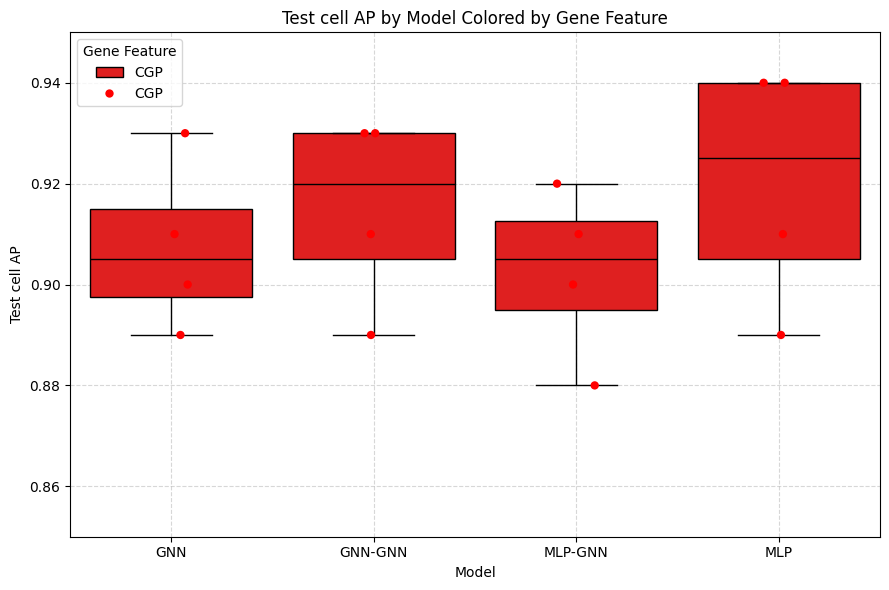

In [14]:

# Map gene features to colors
palette = {"CGP": "red", "C4": "black"}

# Plot
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x="Model", y="Test AP", hue="Gene feature", palette=palette, dodge=True, fliersize=0)
sns.stripplot(data=df, x="Model", y="Test AP", hue="Gene feature", palette=palette, jitter=True, size=6)

plt.title("Test AP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()

# Plot
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x="Model", y="Test gene AP", hue="Gene feature", palette=palette, dodge=True, fliersize=0)
sns.stripplot(data=df, x="Model", y="Test gene AP", hue="Gene feature", palette=palette, jitter=True, size=6)

plt.title("Test gene AP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()

# Plot
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x="Model", y="Test cell AP", hue="Gene feature", palette=palette, dodge=True, fliersize=0)
sns.stripplot(data=df, x="Model", y="Test cell AP", hue="Gene feature", palette=palette, jitter=True, size=6)

plt.title("Test cell AP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()

### AP scores by cell feature

#### colored by gene feature

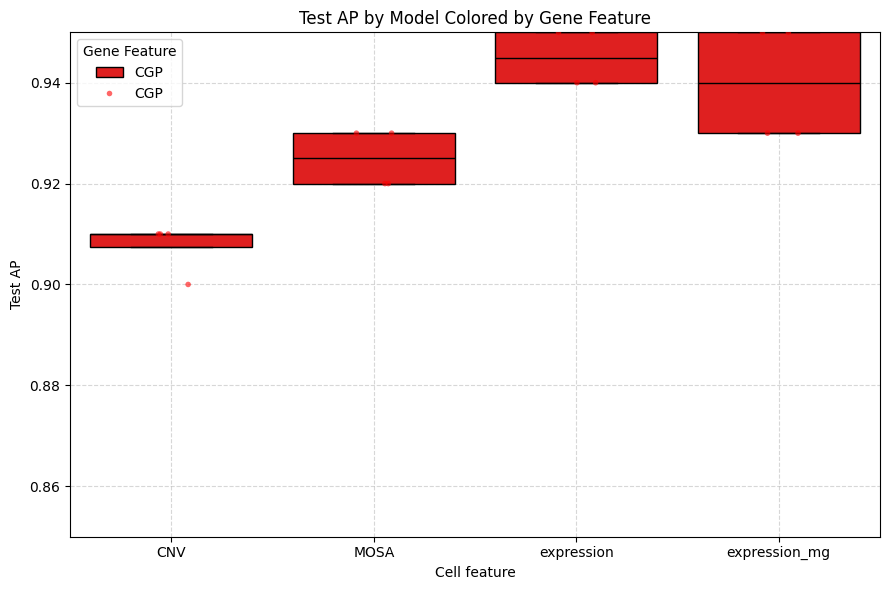

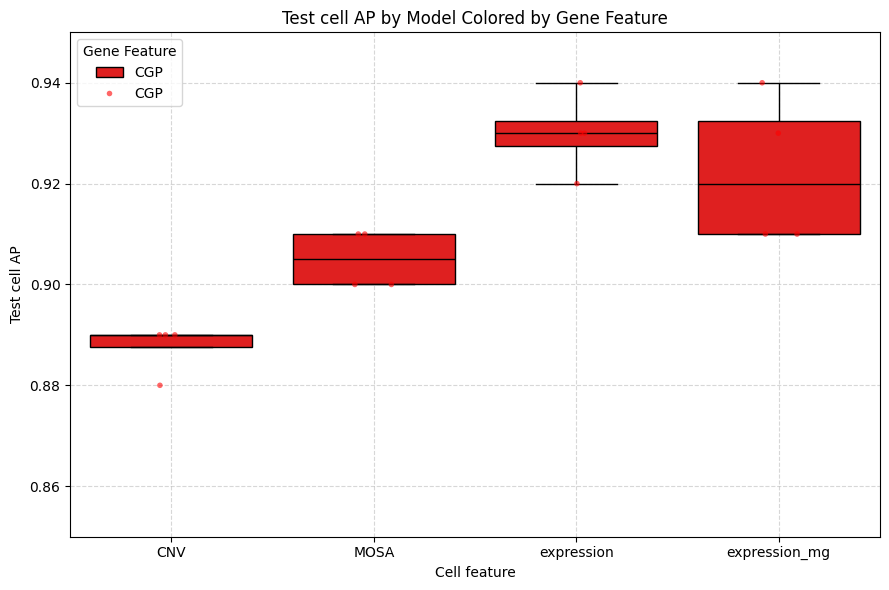

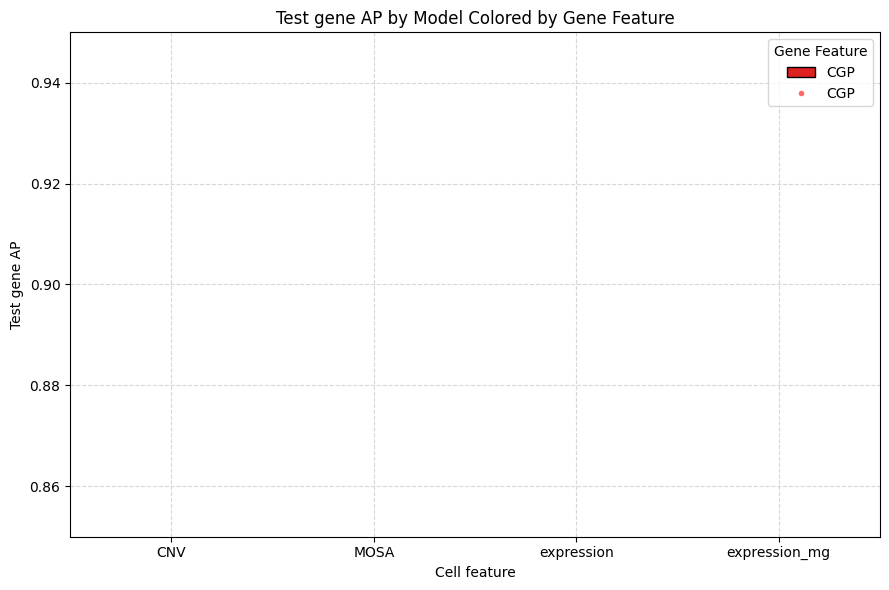

In [15]:
# Plot
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x="Cell feature", y="Test AP", hue="Gene feature", palette=palette, dodge=True, fliersize=0)
sns.stripplot(data=df, x="Cell feature", y="Test AP", hue="Gene feature", palette=palette, dodge=True, jitter=True, size=4, alpha=0.6)

plt.title("Test AP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()


# Plot
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x="Cell feature", y="Test cell AP", hue="Gene feature", palette=palette, dodge=True, fliersize=0)
sns.stripplot(data=df, x="Cell feature", y="Test cell AP", hue="Gene feature", palette=palette, dodge=True, jitter=True, size=4, alpha=0.6)

plt.title("Test cell AP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()


# Plot
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x="Cell feature", y="Test gene AP", hue="Gene feature", palette=palette, dodge=True, fliersize=0)
sns.stripplot(data=df, x="Cell feature", y="Test gene AP", hue="Gene feature", palette=palette, dodge=True, jitter=True, size=4, alpha=0.6)

plt.title("Test gene AP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()

#### colored by model

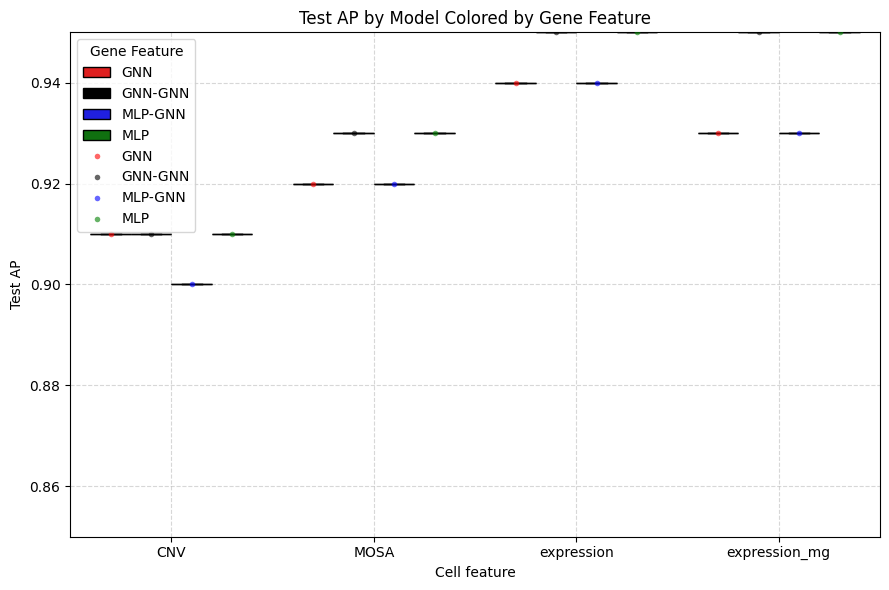

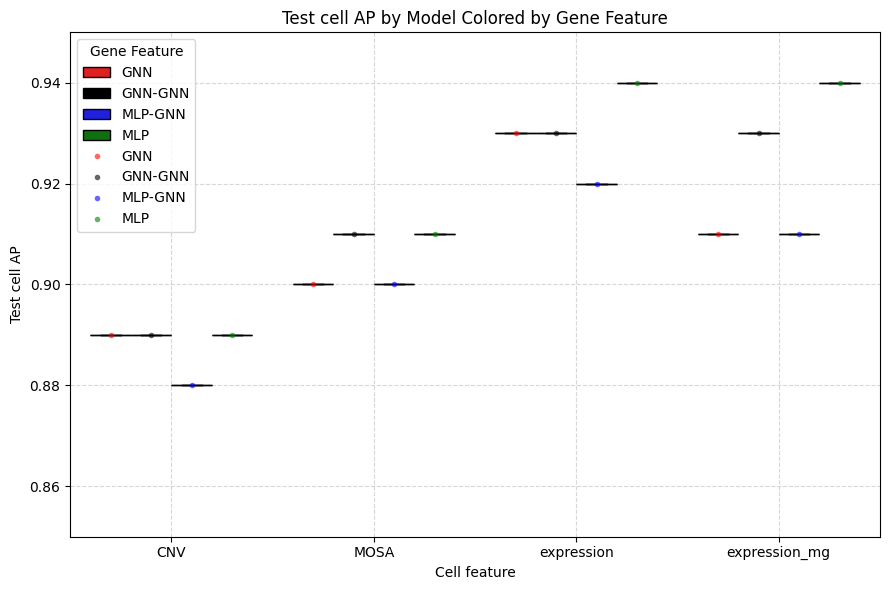

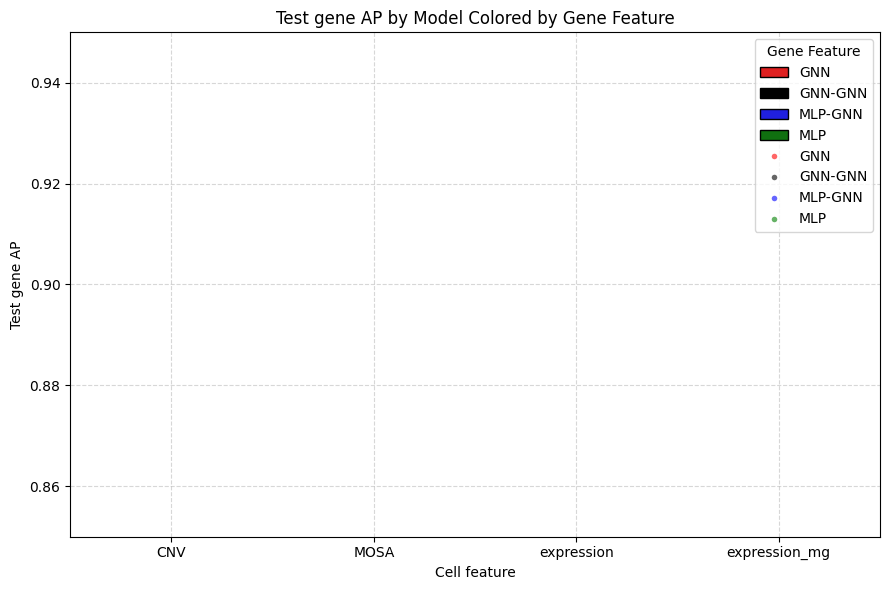

In [16]:
palette2 = {"GNN": "red", "GNN-GNN": "black", "MLP-GNN": "blue", "MLP": "green"}

# Plot
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x="Cell feature", y="Test AP", hue="Model", palette=palette2, dodge=True, fliersize=0)
sns.stripplot(data=df, x="Cell feature", y="Test AP", hue="Model", palette=palette2, dodge=True, jitter=True, size=4, alpha=0.6)

plt.title("Test AP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()

# Plot
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x="Cell feature", y="Test cell AP", hue="Model", palette=palette2, dodge=True, fliersize=0)
sns.stripplot(data=df, x="Cell feature", y="Test cell AP", hue="Model", palette=palette2, dodge=True, jitter=True, size=4, alpha=0.6)

plt.title("Test cell AP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()

# Plot
plt.figure(figsize=(9, 6))
sns.boxplot(data=df, x="Cell feature", y="Test gene AP", hue="Model", palette=palette2, dodge=True, fliersize=0)
sns.stripplot(data=df, x="Cell feature", y="Test gene AP", hue="Model", palette=palette2, dodge=True, jitter=True, size=4, alpha=0.6)

plt.title("Test gene AP by Model Colored by Gene Feature")
plt.ylim(0.85, 0.95)
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend(title="Gene Feature")
plt.tight_layout()
plt.show()

# 3. Statisctical tests

## For model

In [17]:
from scipy.stats import f_oneway

# Example: Test AP by model
groups = [df[df["Model"] == model]["Test AP"] for model in df["Model"].unique()]
f_stat, p_val = f_oneway(*groups)
print("ANOVA Test AP by Model: p =", p_val)


ANOVA Test AP by Model: p = 0.6390069311573682


Null hypothesis: all model's test AP are equal 
--> cannot be rejected because p = 0,14 > 0,05

In [18]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df["Test AP"], groups=df["Model"], alpha=0.05)
print(tukey)


 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj   lower  upper  reject
-----------------------------------------------------
    GNN GNN-GNN     0.01 0.8443 -0.0262 0.0462  False
    GNN     MLP     0.01 0.8443 -0.0262 0.0462  False
    GNN MLP-GNN  -0.0025 0.9968 -0.0387 0.0337  False
GNN-GNN     MLP      0.0    1.0 -0.0362 0.0362  False
GNN-GNN MLP-GNN  -0.0125  0.739 -0.0487 0.0237  False
    MLP MLP-GNN  -0.0125  0.739 -0.0487 0.0237  False
-----------------------------------------------------


Conclusion: all models score equally well

## For gene feature

In [19]:
tukey = pairwise_tukeyhsd(endog=df["Test AP"], groups=df["Gene feature"], alpha=0.05)
print(tukey)

groups = [df[df["Gene feature"] == feature]["Test AP"] for feature in df["Gene feature"].unique()]
f_stat, p_val = f_oneway(*groups)
print("ANOVA Test AP by Gene Feature: p =", p_val)

df.groupby("Gene feature")["Test AP"].mean()


ValueError: 2 or more groups required for multiple comparisons

Conclusion: p<0.05. This means that the CGP scores significantly better than the C4 ?

In [13]:
tukey = pairwise_tukeyhsd(endog=df["Test gene AP"], groups=df["Gene feature"], alpha=0.05)
print(tukey)

groups = [df[df["Gene feature"] == feature]["Test gene AP"] for feature in df["Gene feature"].unique()]
f_stat, p_val = f_oneway(*groups)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    C4    CGP   0.0056 0.3133 -0.0056 0.0168  False
---------------------------------------------------


In [14]:
tukey = pairwise_tukeyhsd(endog=df["Test cell AP"], groups=df["Gene feature"], alpha=0.05)
print(tukey)

groups = [df[df["Gene feature"] == feature]["Test cell AP"] for feature in df["Gene feature"].unique()]
f_stat, p_val = f_oneway(*groups)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
    C4    CGP   0.0125 0.0039 0.0043 0.0207   True
--------------------------------------------------


In [15]:
df.groupby("Gene feature")["Test cell AP"].mean()


Gene feature
C4     0.881875
CGP    0.894375
Name: Test cell AP, dtype: float64

## For cell features

In [16]:
tukey = pairwise_tukeyhsd(endog=df["Test gene AP"], groups=df["Cell feature"], alpha=0.05)
print(tukey)

df.groupby("Cell feature")["Test gene AP"].mean()



     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1       group2    meandiff p-adj   lower  upper  reject
--------------------------------------------------------------
       CNV          MOSA   0.0275 0.0008  0.0104 0.0446   True
       CNV    expression   0.0162 0.0668 -0.0008 0.0333  False
       CNV expression_mg   0.0125 0.2131 -0.0046 0.0296  False
      MOSA    expression  -0.0112 0.2957 -0.0283 0.0058  False
      MOSA expression_mg   -0.015  0.101 -0.0321 0.0021  False
expression expression_mg  -0.0038 0.9315 -0.0208 0.0133  False
--------------------------------------------------------------


Cell feature
CNV              0.88500
MOSA             0.91250
expression       0.90125
expression_mg    0.89750
Name: Test gene AP, dtype: float64

In [17]:
tukey = pairwise_tukeyhsd(endog=df["Test AP"], groups=df["Cell feature"], alpha=0.05)
print(tukey)

df.groupby("Cell feature")["Test AP"].mean()


     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1       group2    meandiff p-adj   lower  upper  reject
--------------------------------------------------------------
       CNV          MOSA   0.0038 0.9451 -0.0148 0.0223  False
       CNV    expression    0.005 0.8816 -0.0135 0.0235  False
       CNV expression_mg     -0.0    1.0 -0.0185 0.0185  False
      MOSA    expression   0.0012 0.9977 -0.0173 0.0198  False
      MOSA expression_mg  -0.0038 0.9451 -0.0223 0.0148  False
expression expression_mg   -0.005 0.8816 -0.0235 0.0135  False
--------------------------------------------------------------


Cell feature
CNV              0.91125
MOSA             0.91500
expression       0.91625
expression_mg    0.91125
Name: Test AP, dtype: float64

In [18]:
tukey = pairwise_tukeyhsd(endog=df["Test cell AP"], groups=df["Cell feature"], alpha=0.05)
print(tukey)

df.groupby("Cell feature")["Test cell AP"].mean()


     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
  group1       group2    meandiff p-adj   lower  upper  reject
--------------------------------------------------------------
       CNV          MOSA  -0.0038 0.9423 -0.0219 0.0144  False
       CNV    expression  -0.0038 0.9423 -0.0219 0.0144  False
       CNV expression_mg   -0.005 0.8758 -0.0232 0.0132  False
      MOSA    expression     -0.0    1.0 -0.0182 0.0182  False
      MOSA expression_mg  -0.0012 0.9976 -0.0194 0.0169  False
expression expression_mg  -0.0012 0.9976 -0.0194 0.0169  False
--------------------------------------------------------------


Cell feature
CNV              0.89125
MOSA             0.88750
expression       0.88750
expression_mg    0.88625
Name: Test cell AP, dtype: float64